In [1]:
import sys

sys.path.append('../xor_neuron')

In [2]:
%matplotlib inline
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt

In [3]:
import pickle
from glob import glob
import os
import yaml
from easydict import EasyDict as edict
import numpy as np
import torch
from scipy.signal import convolve2d, fftconvolve, convolve
from scipy.stats import multivariate_normal
from scipy.optimize import curve_fit
from scipy.spatial.distance import cosine

import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages

from model import *
from utils.train_helper import save_outphase, make_mask, load_model

In [4]:
def quad_func(x, c):
    y = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
        y[i] = c[0]*x[i,0]**2 + c[1]*x[i,1]**2 + c[2]*x[i,0]*x[i,1] + c[3]*x[i,0] + c[4]*x[i,1] + c[5]
    return y

def quad_scalar_func(x, c0, c1, c2, c3, c4, c5):
    return c0*x[0]**2 + c1*x[1]**2 + c2*x[0]*x[1] + c3*x[0] + c4*x[1] + c5

In [7]:
dirs = glob('../Xor_Resnet20/*_211*')

In [8]:
dirs

['../Xor_Resnet20/Xor_ResNet_1_cifar10_211147',
 '../Xor_Resnet20/Xor_ResNet_1_cifar10_211959']

In [20]:
dirs = glob('../exp/2D_ARG/MLP/MNIST/Layer_norm/*')
dirs.sort()
dirs

[]

In [21]:
dirs_normal = glob('../exp/xor_neuron_conv_cifar/*')
dirs_normal.sort(key=os.path.abspath)
dirs_normal = dirs_normal[:-1]
dirs_normal

['../exp/xor_neuron_conv_cifar/ComplexNeuronConv_001_cifar10_2021-Apr-20-07-17-22',
 '../exp/xor_neuron_conv_cifar/ComplexNeuronConv_001_cifar10_2021-Apr-20-07-17-25']

In [22]:
dirs_normal = glob('../exp/CIFAR100/xor_neuron_conv/*')
dirs_normal.sort(key=os.path.abspath)
dirs_normal

['../exp/CIFAR100/xor_neuron_conv/ComplexNeuronConv_1_cifar100_0730',
 '../exp/CIFAR100/xor_neuron_conv/ComplexNeuronConv_2_cifar100_0730']

In [23]:
dirs2_normal = glob('../exp/2D_ARG/Conv/CIFAR100/*')
dirs2_normal.sort(key=os.path.abspath)
dirs2_normal

[]

In [24]:
dirs3_normal =  glob('../exp/2D_arg/CIFAR10/*')
dirs3_normal.sort(key=os.path.abspath)
dirs3_normal

['../exp/2D_arg/CIFAR10/ComplexNeuronConv_1_cifar10_0759',
 '../exp/2D_arg/CIFAR10/ComplexNeuronConv_2_cifar10_0759',
 '../exp/2D_arg/CIFAR10/ComplexNeuronConv_3_cifar10_0759',
 '../exp/2D_arg/CIFAR10/ComplexNeuronConv_4_cifar10_0759',
 '../exp/2D_arg/CIFAR10/ComplexNeuronConv_5_cifar10_0759',
 '../exp/2D_arg/CIFAR10/ComplexNeuronConv_6_cifar10_0759',
 '../exp/2D_arg/CIFAR10/ComplexNeuronConv_7_cifar10_0759']

In [25]:
dirs_normal = dirs2_normal + dirs_normal + dirs3_normal

In [26]:
dirs_normal = dirs2_normal + dirs_normal

In [27]:
len(dirs_normal)

9

In [28]:
dirs_xor_conv_cifar100 = glob('../exp/CIFAR100/xor_neuron_conv/*')
dirs_xor_conv_cifar100.sort(key=os.path.abspath)
dirs_xor_conv_cifar100

['../exp/CIFAR100/xor_neuron_conv/ComplexNeuronConv_1_cifar100_0730',
 '../exp/CIFAR100/xor_neuron_conv/ComplexNeuronConv_2_cifar100_0730']

In [29]:
dirs_xor_mlp_cifar100 = glob('../exp/CIFAR100/xor_neuron_mlp/*')
dirs_xor_mlp_cifar100.sort(key=os.path.abspath)
dirs_xor_mlp_cifar100

['../exp/CIFAR100/xor_neuron_mlp/ComplexNeuronMLP_1_cifar100_0727',
 '../exp/CIFAR100/xor_neuron_mlp/ComplexNeuronMLP_2_cifar100_0727']

In [30]:
dirs = dirs_xor_mlp_cifar100

In [145]:
dirs_xor_conv_cifar100_innernet = glob('../2d-arg/Conv/CIFAR100/InnerNet_Output/*')
dirs_xor_conv_cifar100_innernet.sort(key=os.path.abspath)
dirs_xor_conv_cifar100_innernet

['../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1101.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1102.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1103.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1104.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1105.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1106.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1107.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1108.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1109.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1111.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1112.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1113.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1114.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1115.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1116.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1117.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1118.p',
 '../2d-arg/Conv/CIFAR100/InnerNet_Output/out_1119.p',
 '../2d-ar

In [146]:
dirs_xor_conv_cifar100_input_dis = glob('../2d-arg/Conv/CIFAR100/Input_Distribution/*')
dirs_xor_conv_cifar100_input_dis.sort(key=os.path.abspath)
dirs_xor_conv_cifar100_input_dis

['../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1101.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1102.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1103.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1104.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1105.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1106.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1107.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1108.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1109.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1111.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1112.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1113.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_distribution_1114.p',
 '../2d-arg/Conv/CIFAR100/Input_Distribution/input_

In [81]:
seed_list = []

for dr in dirs_xor_mlp_cifar100_input_dis:
    seed_list.append(int(dr[61:][:-2]))

In [136]:
pretrain = glob('../pretrain/2D_ARG/*')
pretrain.sort()
pretrain

['../pretrain/2D_ARG/ComplexNeuronConv_1101_073315',
 '../pretrain/2D_ARG/ComplexNeuronConv_1102_073819',
 '../pretrain/2D_ARG/ComplexNeuronConv_1103_074314',
 '../pretrain/2D_ARG/ComplexNeuronConv_1104_074813',
 '../pretrain/2D_ARG/ComplexNeuronConv_1105_075316',
 '../pretrain/2D_ARG/ComplexNeuronConv_1106_075815',
 '../pretrain/2D_ARG/ComplexNeuronConv_1107_073318',
 '../pretrain/2D_ARG/ComplexNeuronConv_1108_073609',
 '../pretrain/2D_ARG/ComplexNeuronConv_1109_073854',
 '../pretrain/2D_ARG/ComplexNeuronConv_1110_074140',
 '../pretrain/2D_ARG/ComplexNeuronConv_1111_074430',
 '../pretrain/2D_ARG/ComplexNeuronConv_1112_074717',
 '../pretrain/2D_ARG/ComplexNeuronConv_1113_073321',
 '../pretrain/2D_ARG/ComplexNeuronConv_1114_073612',
 '../pretrain/2D_ARG/ComplexNeuronConv_1115_073859',
 '../pretrain/2D_ARG/ComplexNeuronConv_1116_074146',
 '../pretrain/2D_ARG/ComplexNeuronConv_1117_074433',
 '../pretrain/2D_ARG/ComplexNeuronConv_1118_074719',
 '../pretrain/2D_ARG/ComplexNeuronConv_1119_07

In [157]:
mode3 = True

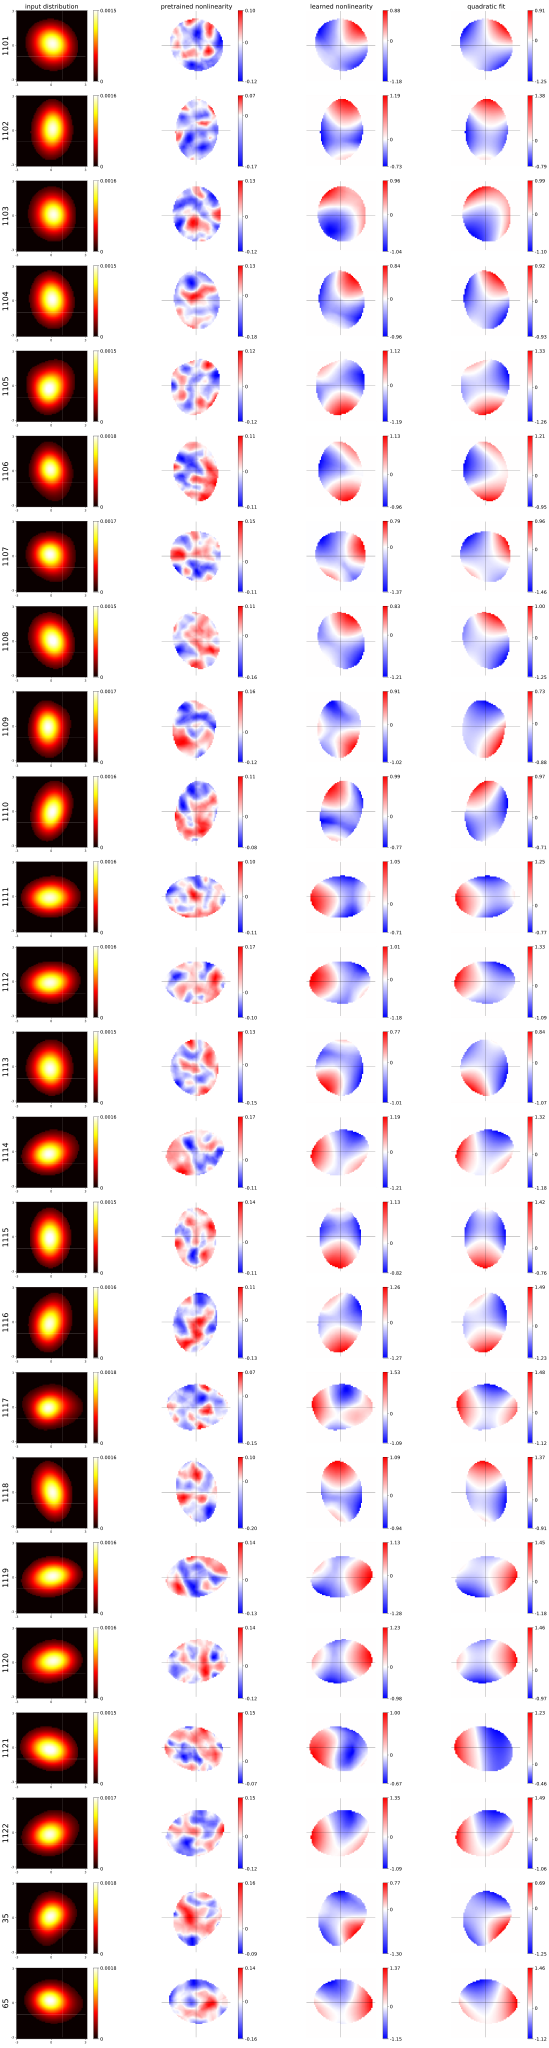

In [158]:
exp_len = len(dirs_xor_mlp_cifar100_input_dis)
# exp_len = 2

f, axes = plt.subplots(nrows=exp_len, ncols=4, figsize=(32, 5*exp_len), dpi=70)

nb = 101
num = 5

x = np.linspace(-num, num, nb)
y = np.linspace(-num, num, nb)
xv, yv = np.meshgrid(x, y)
xy = np.vstack([xv.reshape(-1), yv.reshape(-1)]).T


for ii in range(exp_len):
    innernet = pickle.load(open(dirs_xor_conv_cifar100_innernet[ii], 'rb'))
#     innernet = innernet[:,-1].reshape(101,101)
    innernet = innernet[-1,:,:]
    
    input_distribution = pickle.load(open(dirs_xor_conv_cifar100_input_dis[ii], 'rb'))
    pdf = input_distribution
    
    
    # ========== Column 1: Input distribution ==============
    
    threshold = 0.0005
    while True:
        row, col = np.where(pdf > threshold)
        if sum(pdf[row, col]) > 0.9:
            break
        else:
            threshold -= 0.00001

    mask = np.empty((nb, nb))
    mask[:] = np.nan
    mask[row, col] = 1

    mask_zero = np.zeros((nb,nb))
    mask_zero[row, col] = 1

    cmax = max(mask_zero.flatten() * pdf.flatten()).round(4)
    data = mask_zero * pdf

    if mode3:
        im = axes[ii,0].imshow(data[20:-19,20:-19], cmap='hot', vmin=0, vmax=cmax)
        
        axes[ii,0].set_xticks([0, 30, 60])
        axes[ii,0].set_xticklabels(['-3', '0', '3'])
        axes[ii,0].set_yticks([0, 30, 60])
        axes[ii,0].set_yticklabels(['3', '0', '-3'])
        axes[ii,0].plot([0,60], [40, 40], 'w', lw=0.3)
        axes[ii,0].plot([40,40], [0,60], 'w', lw=0.3)
        
    else:
        im = axes[ii,0].imshow(data, cmap='hot', vmin=0, vmax=cmax)
        
        axes[ii,0].set_xticks([0, 50, 100])
        axes[ii,0].set_xticklabels(['-5', '0', '5'])
        axes[ii,0].set_yticks([0, 50, 100])
        axes[ii,0].set_yticklabels(['5', '0', '-5'])
        axes[ii,0].plot([0,100], [50, 50], 'w', lw=0.3)
        axes[ii,0].plot([50,50], [0,100], 'w', lw=0.3)
        
    if ii == 0:
        axes[ii,0].set_title('input distribution', fontsize=20)
        
    seed = dirs_xor_mlp_cifar100_input_dis[ii][61:][:-2]
    
    axes[ii,0].set_ylabel(f'{seed}', fontsize=25)
    cbar = f.colorbar(im, ax=axes[ii,0], aspect=15, ticks=[0, cmax])
    cbar.ax.set_yticklabels([0, cmax], fontsize=15)
    
    
    # ========== Column 2: Pre-trained  ==============
    pretrain_config_file = glob(pretrain[ii] + '/*.yaml')[0]
    pretrain_config = edict(yaml.load(open(pretrain_config_file, 'r'), Loader=yaml.FullLoader))

    # create models
    model_pretrain = InnerNet(pretrain_config)

    # load test model
    load_model(model_pretrain.inner_net, pretrain_config.model_save + pretrain_config.pretrain.best_model[0])

    nb = 101
    num = 5

    x = np.linspace(-num, num, nb)
    y = np.linspace(-num, num, nb)
    xv, yv = np.meshgrid(x, y)
    xy = np.vstack([xv.reshape(-1), yv.reshape(-1)]).T

    mvn = multivariate_normal(mean=[0, 0], cov=[[1/4, 0], [0, 1/4]])
    gaussian_kernel = mvn.pdf(xy).reshape(nb, nb)
    gaussian_kernel /= gaussian_kernel.sum()

    model_pretrain.eval()
    model_phase1.eval()

    if pretrain_config.model.inner_net == 'mlp':
        out_pretrain = model_pretrain.inner_net(torch.Tensor(xy))
        out_pretrain = out_pretrain.reshape(-1,1)


    elif pretrain_config.model.inner_net == 'conv':
        sqrt_batch_size = np.int(np.sqrt(xy.shape[0]))
        assert sqrt_batch_size ** 2 == xy.shape[0]
        out = xy.T.reshape(1, config.model.arg_in_dim, sqrt_batch_size, sqrt_batch_size)

        out_pretrain = model_pretrain.inner_net(torch.Tensor(out))
        out_pretrain = out_pretrain.reshape(-1,1)
        
    out_pretrain = out_pretrain.data.cpu().numpy().reshape(nb,nb)
    data = mask_zero * out_pretrain
    cmax = max(data.flatten())
    cmin = min(data.flatten())
    norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    data = mask*out_pretrain
    
    
    if mode3:
        im = axes[ii,1].imshow(data[20:-19,20:-19], cmap='bwr', norm = norm)
        axes[ii,1].plot([0,60], [30,30], 'k', lw=0.5)
        axes[ii,1].plot([30,30], [0,60], 'k', lw=0.5)
        
    else:
        im = axes[ii,1].imshow(data, cmap='bwr', norm = norm)
        axes[ii,1].plot([0,100], [50,50], 'k', lw=0.5)
        axes[ii,1].plot([50,50], [0,100], 'k', lw=0.5)
        
        
    if ii == 0:
        axes[ii,1].set_title('pretrained nonlinearity', fontsize=20)
        
    axes[ii,1].axis('off')
#     axes[ii,1].set_xticks([0, 60, 120])
#     axes[ii,1].set_xticklabels(['-3', '0', '3'])
#     axes[ii,1].set_yticks([0, 60, 120])
#     axes[ii,1].set_yticklabels(['3', '0', '-3'])
#     axes[ii,1].plot([0,100], [50,50], 'k', lw=0.5)
#     axes[ii,1].plot([50,50], [0,100], 'k', lw=0.5)

    cbar = f.colorbar(im, ax=axes[ii,1], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)

    
    
    
    # ========== Column 3: Trained nonlinearity ==============
    data = mask_zero * innernet
    
    cmax = max(data.flatten())
    cmin = min(data.flatten())
    
    norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    
    if mode3:
        im = axes[ii,2].imshow(data[20:-19,20:-19], cmap='bwr', norm = norm)
        axes[ii,2].plot([0,60], [30,30], 'k', lw=0.5)
        axes[ii,2].plot([30,30], [0,60], 'k', lw=0.5)
        
    else:
        im = axes[ii,2].imshow(data, cmap='bwr', norm = norm)
        axes[ii,2].plot([0,100], [50,50], 'k', lw=0.5)
        axes[ii,2].plot([50,50], [0,100], 'k', lw=0.5)
        
        
    if ii == 0:
        axes[ii,2].set_title('learned nonlinearity', fontsize=20)
        
    axes[ii,2].axis('off')
#     axes[ii,2].set_xticks([0, 60, 120])
#     axes[ii,2].set_xticklabels(['-3', '0', '3'])
#     axes[ii,2].set_yticks([0, 60, 120])
#     axes[ii,2].set_yticklabels(['3', '0', '-3'])
#     axes[ii,2].plot([0,100], [50,50], 'k', lw=0.5)
#     axes[ii,2].plot([50,50], [0,100], 'k', lw=0.5)
    cbar = f.colorbar(im, ax=axes[ii,2], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)
    
    # ========= Column 4: Curve fit ===============
    xv_ = xv.reshape(-1)
    yv_ = yv.reshape(-1)

    out_phase1 = innernet.flatten() * mask.flatten()
    nan_list = np.argwhere(np.isnan(out_phase1))

    xv_ = xv_[np.logical_not(np.isnan(xv_*out_phase1))]
    yv_ = yv_[np.logical_not(np.isnan(yv_*out_phase1))]
    out_phase1 = out_phase1[np.logical_not(np.isnan(out_phase1))]

    xy = np.vstack([xv_, yv_]).T

    popt, pcov = curve_fit(quad_scalar_func, xy.T, out_phase1)
    quad_no_nan = quad_func(xy, popt)
    distance = cosine(out_phase1.flatten(), quad_no_nan.flatten())

    quad_fit = np.zeros(nb*nb)
    j = 0
    for i in range(nb*nb):
        if np.isin(i, nan_list) == False:
            quad_fit[i] = quad_no_nan[j]
            j+=1
    quad_fit = quad_fit.reshape(nb, nb)
    data = mask_zero * quad_fit

    cmax = max(data.flatten())
    cmin = min(data.flatten())

    if cmax < 0:
        norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=cmax, vmax=0)
    elif cmin > 0:
        norm = colors.TwoSlopeNorm(vmin=0, vcenter=cmin, vmax=cmax)
    else:
        norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
        
    if mode3:
        im = axes[ii,3].imshow(data[20:-19,20:-19], cmap='bwr', norm=norm)
        axes[ii,3].plot([0,60], [30,30], 'k', lw=0.5)
        axes[ii,3].plot([30,30], [0,60], 'k', lw=0.5)
        
    else:
        im = axes[ii,3].imshow(data, cmap='bwr', norm=norm)
        axes[ii,3].plot([0,100], [50,50], 'k', lw=0.5)
        axes[ii,3].plot([50,50], [0,100], 'k', lw=0.5)
    
    if ii == 0:
        axes[ii,3].set_title('quadratic fit', fontsize=20)
    axes[ii,3].axis('off')
#     axes[ii,3].set_xticks([0, 60, 120])
#     axes[ii,3].set_xticklabels(['-3', '0', '3'])
#     axes[ii,3].set_yticks([0, 60, 120])
#     axes[ii,3].set_yticklabels(['3', '0', '-3'])
#     axes[ii,3].plot([0,100], [50,50], 'k', lw=0.5)
#     axes[ii,3].plot([50,50], [0,100], 'k', lw=0.5)

    cbar = f.colorbar(im, ax=axes[ii,3], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)
    
plt.savefig(f'./{config.model.inner_net}_{config.dataset.name}.pdf')

Text(0.5, 0.98, 'MLP CIFAR100')

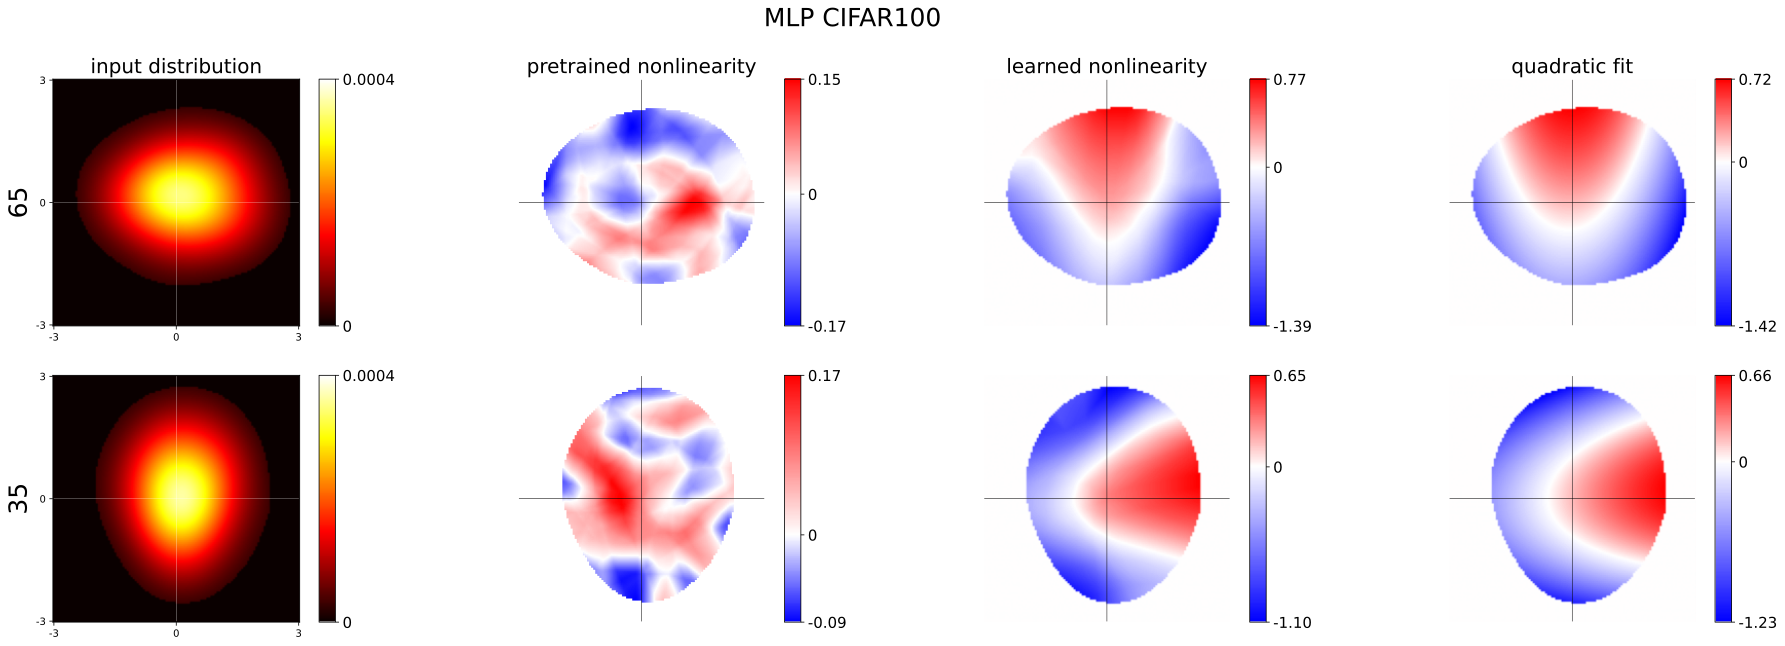

In [31]:
f, axes = plt.subplots(nrows=len(dirs), ncols=4, figsize=(32, 5*len(dirs)), dpi=70)

for ii, dr in enumerate(dirs):
#     phase1_file = glob(dr + '/train_stats_phase1.p')[0]
#     phase2_file = glob(dr + '/train_stats_phase2.p')[0]
#     phase1_data = pickle.load(open(phase1_file, 'rb'))
#     phase2_data = pickle.load(open(phase2_file, 'rb'))
    
    config_file = glob(dr + '/*.yaml')[0]
    config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

    # create models
    model_pretrain = InnerNet(config)
    model_phase1 = InnerNet(config)

    # load test model
    load_model(model_pretrain.inner_net, config.model_save + config.pretrain.best_model[0])

    model_snapshot = torch.load(config.model_save + config.train.best_model, map_location=torch.device('cpu'))

    for key in list(model_snapshot['model'].keys()):
        model_snapshot['model'][key.replace('0', 'inner_net')] = model_snapshot['model'].pop(key)

    model_phase1.load_state_dict(model_snapshot["model"], strict=True)

    nb = 121
    num = 3

    x = np.linspace(-num, num, nb)
    y = np.linspace(-num, num, nb)
    xv, yv = np.meshgrid(x, y)
    xy = np.vstack([xv.reshape(-1), yv.reshape(-1)]).T

    mvn = multivariate_normal(mean=[0, 0], cov=[[1/4, 0], [0, 1/4]])
    gaussian_kernel = mvn.pdf(xy).reshape(nb, nb)
    gaussian_kernel /= gaussian_kernel.sum()

    model_pretrain.eval()
    model_phase1.eval()

    if config.model.inner_net == 'mlp':
        out_pretrain = model_pretrain.inner_net(torch.Tensor(xy))
        out_pretrain = out_pretrain.reshape(-1,1)

        out_phase1 = model_phase1.inner_net(torch.Tensor(xy))
        out_phase1 = out_phase1.reshape(-1,1)

    elif config.model.inner_net == 'conv':
        sqrt_batch_size = np.int(np.sqrt(xy.shape[0]))
        assert sqrt_batch_size ** 2 == xy.shape[0]
        out = xy.T.reshape(1, config.model.arg_in_dim, sqrt_batch_size, sqrt_batch_size)

        out_pretrain = model_pretrain.inner_net(torch.Tensor(out))
        out_pretrain = out_pretrain.reshape(-1,1)

        out_phase1 = model_phase1.inner_net(torch.Tensor(out))
        out_phase1 = out_phase1.reshape(-1,1)

    # ========== Column 1: Input distribution ==============
    input2innerAll = glob(dr+'/in2cells.p')
    if len(input2innerAll) == 0:
        input2innerAll = glob(dr+'/model_save/in2cells.p')
    input2innerAll = input2innerAll[0]
    input2innerAll = pickle.load(open(input2innerAll, 'rb'))
    input2innerAll = [input2innerAll[k] for k in range(len(input2innerAll))]
    
    if config.model.inner_net == 'mlp':
        input2innerAll = np.array(input2innerAll)
        
    elif config.model.inner_net == 'conv':
        input2innerAll = np.array(input2innerAll[0])
        
    input2innerAll = np.moveaxis(input2innerAll, -1, 0)
    input2innerAll = input2innerAll.reshape((config.model.arg_in_dim, -1))

    xedges = yedges = np.arange(-5.05,5.1,0.1)
    if num == 3:
        xedges = yedges = np.arange(-3.05,3.05,0.05)
    pdf, _, _ = np.histogram2d(input2innerAll[0], input2innerAll[1], bins=(xedges, yedges))
    pdf = convolve2d(pdf, gaussian_kernel, mode='same')
    pdf /= sum(pdf.flatten())

    threshold = 0.0005
    while True:
        row, col = np.where(pdf > threshold)
        if sum(pdf[row, col]) > 0.9:
            break
        else:
            threshold -= 0.00001

    mask = np.empty((nb, nb))
    mask[:] = np.nan
    mask[row, col] = 1

    mask_zero = np.zeros((nb,nb))
    mask_zero[row, col] = 1

    cmax = max(mask_zero.flatten() * pdf.flatten()).round(4)
    data = mask_zero * pdf

    im = axes[ii,0].imshow(data, cmap='hot', vmin=0, vmax=cmax)
    if ii == 0:
        axes[ii,0].set_title('input distribution', fontsize=20)
    axes[ii,0].set_ylabel(f'{config.seed}', fontsize=25)
    axes[ii,0].set_xticks([0, 20*num, 40*num])
    axes[ii,0].set_xticklabels(['-3', '0', '3'])
    axes[ii,0].set_yticks([0, 20*num, 40*num])
    axes[ii,0].set_yticklabels(['3', '0', '-3'])
    axes[ii,0].plot([0,40*num], [20*num,20*num], 'w', lw=0.3)
    axes[ii,0].plot([20*num,20*num], [0,40*num], 'w', lw=0.3)
    cbar = f.colorbar(im, ax=axes[ii,0], aspect=15, ticks=[0, cmax])
    cbar.ax.set_yticklabels([0, cmax], fontsize=15)


    # ========== Column 2: Pre-trained  ==============
    out_pretrain = out_pretrain.data.cpu().numpy().reshape(nb,nb)
    data = mask_zero * out_pretrain
    cmax = max(data.flatten())
    cmin = min(data.flatten())
    norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    data = mask*out_pretrain

    im = axes[ii,1].imshow(data, cmap='bwr', norm = norm)
    if ii == 0:
        axes[ii,1].set_title('pretrained nonlinearity', fontsize=20)
    axes[ii,1].axis('off')
#     axes[ii,1].set_xticks([0, 60, 120])
#     axes[ii,1].set_xticklabels(['-3', '0', '3'])
#     axes[ii,1].set_yticks([0, 60, 120])
#     axes[ii,1].set_yticklabels(['3', '0', '-3'])
    axes[ii,1].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
    axes[ii,1].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
    cbar = f.colorbar(im, ax=axes[ii,1], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)


    # ========== Column 3: Trained nonlinearity ==============
    out_phase1 = out_phase1.data.cpu().numpy().reshape(nb, nb)
    data = mask_zero * out_phase1

    cmax = max(data.flatten())
    cmin = min(data.flatten())
    norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    im = axes[ii,2].imshow(data, cmap='bwr', norm = norm)
    if ii == 0:
        axes[ii,2].set_title('learned nonlinearity', fontsize=20)
    axes[ii,2].axis('off')
#     axes[ii,2].set_xticks([0, 60, 120])
#     axes[ii,2].set_xticklabels(['-3', '0', '3'])
#     axes[ii,2].set_yticks([0, 60, 120])
#     axes[ii,2].set_yticklabels(['3', '0', '-3'])
    axes[ii,2].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
    axes[ii,2].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
    cbar = f.colorbar(im, ax=axes[ii,2], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)

    # ========= Column 4: Curve fit ===============
    xv_ = xv.reshape(-1)
    yv_ = yv.reshape(-1)

    out_phase1 = out_phase1.flatten() * mask.flatten()
    nan_list = np.argwhere(np.isnan(out_phase1))

    xv_ = xv_[np.logical_not(np.isnan(xv_*out_phase1))]
    yv_ = yv_[np.logical_not(np.isnan(yv_*out_phase1))]
    out_phase1 = out_phase1[np.logical_not(np.isnan(out_phase1))]

    xy = np.vstack([xv_, yv_]).T

    popt, pcov = curve_fit(quad_scalar_func, xy.T, out_phase1)
    quad_no_nan = quad_func(xy, popt)
    distance = cosine(out_phase1.flatten(), quad_no_nan.flatten())

    quad_fit = np.zeros(nb*nb)
    j = 0
    for i in range(nb*nb):
        if np.isin(i, nan_list) == False:
            quad_fit[i] = quad_no_nan[j]
            j+=1
    quad_fit = quad_fit.reshape(nb, nb)
    data = mask_zero * quad_fit

    cmax = max(data.flatten())
    cmin = min(data.flatten())

    if cmax < 0:
        norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=cmax, vmax=0)
    elif cmin > 0:
        norm = colors.TwoSlopeNorm(vmin=0, vcenter=cmin, vmax=cmax)
    else:
        norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    im = axes[ii,3].imshow(data, cmap='bwr', norm=norm)
    if ii == 0:
        axes[ii,3].set_title('quadratic fit', fontsize=20)
    axes[ii,3].axis('off')
#     axes[ii,3].set_xticks([0, 60, 120])
#     axes[ii,3].set_xticklabels(['-3', '0', '3'])
#     axes[ii,3].set_yticks([0, 60, 120])
#     axes[ii,3].set_yticklabels(['3', '0', '-3'])
    axes[ii,3].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
    axes[ii,3].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
    cbar = f.colorbar(im, ax=axes[ii,3], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)


plt.suptitle(f'{config.model.inner_net.upper()} {config.dataset.name.upper()}',fontsize=25)

# plt.savefig(f'./{config.model.inner_net}_{config.dataset.name}.jpg')

## Threshold

In [ ]:
threshold_list = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

In [ ]:
for thr in threshold_list:
    f, axes = plt.subplots(nrows=len(dirs), ncols=4, figsize=(30, 5*len(dirs)), dpi=70)

    for ii, dr in enumerate(dirs):
    #     phase1_file = glob(dr + '/train_stats_phase1.p')[0]
    #     phase2_file = glob(dr + '/train_stats_phase2.p')[0]
    #     phase1_data = pickle.load(open(phase1_file, 'rb'))
    #     phase2_data = pickle.load(open(phase2_file, 'rb'))

        config_file = glob(dr + '/*.yaml')[0]
        config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

        # create models
        model_pretrain = InnerNet(config)
        model_phase1 = InnerNet(config)

        # load test model
        load_model(model_pretrain.inner_net, config.model_save + config.pretrain.best_model[0])

        model_snapshot = torch.load(config.model_save + config.train.best_model, map_location=torch.device('cpu'))

        for key in list(model_snapshot['model'].keys()):
            model_snapshot['model'][key.replace('0', 'inner_net')] = model_snapshot['model'].pop(key)

        model_phase1.load_state_dict(model_snapshot["model"], strict=True)

        nb = 121
        num = 3

        x = np.linspace(-num, num, nb)
        y = np.linspace(-num, num, nb)
        xv, yv = np.meshgrid(x, y)
        xy = np.vstack([xv.reshape(-1), yv.reshape(-1)]).T

        mvn = multivariate_normal(mean=[0, 0], cov=[[1/4, 0], [0, 1/4]])
        gaussian_kernel = mvn.pdf(xy).reshape(nb, nb)
        gaussian_kernel /= gaussian_kernel.sum()

        model_pretrain.eval()
        model_phase1.eval()

        if config.model.inner_net == 'mlp':
            out_pretrain = model_pretrain.inner_net(torch.Tensor(xy))
            out_pretrain = out_pretrain.reshape(-1,1)

            out_phase1 = model_phase1.inner_net(torch.Tensor(xy))
            out_phase1 = out_phase1.reshape(-1,1)

        elif config.model.inner_net == 'conv':
            sqrt_batch_size = np.int(np.sqrt(xy.shape[0]))
            assert sqrt_batch_size ** 2 == xy.shape[0]
            out = xy.T.reshape(1, config.model.arg_in_dim, sqrt_batch_size, sqrt_batch_size)

            out_pretrain = model_pretrain.inner_net(torch.Tensor(out))
            out_pretrain = out_pretrain.reshape(-1,1)

            out_phase1 = model_phase1.inner_net(torch.Tensor(out))
            out_phase1 = out_phase1.reshape(-1,1)

        # ========== Column 1: Input distribution ==============
        input2innerAll = glob(dr+'/in2cells.p')
        if len(input2innerAll) == 0:
            input2innerAll = glob(dr+'/model_save/in2cells.p')
        input2innerAll = input2innerAll[0]
        input2innerAll = pickle.load(open(input2innerAll, 'rb'))
        input2innerAll = [input2innerAll[k] for k in range(len(input2innerAll))]
        input2innerAll = np.array(input2innerAll)
        input2innerAll = np.moveaxis(input2innerAll, -1, 0)
        input2innerAll = input2innerAll.reshape((config.model.arg_in_dim, -1))

        xedges = yedges = np.arange(-5.05,5.1,0.1)
        if num == 3:
            xedges = yedges = np.arange(-3.05,3.05,0.05)
        pdf, _, _ = np.histogram2d(input2innerAll[0], input2innerAll[1], bins=(xedges, yedges))
        pdf = convolve2d(pdf, gaussian_kernel, mode='same')
        pdf /= sum(pdf.flatten())

        threshold = 0.0005
        while True:
            row, col = np.where(pdf > threshold)
            if sum(pdf[row, col]) > thr:
                break
            else:
                threshold -= 0.00001

        mask = np.empty((nb, nb))
        mask[:] = np.nan
        mask[row, col] = 1

        mask_zero = np.zeros((nb,nb))
        mask_zero[row, col] = 1

        cmax = max(mask_zero.flatten() * pdf.flatten()).round(4)
        data = mask_zero * pdf

        im = axes[ii,0].imshow(data, cmap='hot', vmin=0, vmax=cmax)
        if ii == 0:
            axes[ii,0].set_title('input distribution', fontsize=20)
        axes[ii,0].set_ylabel(f'Trial {ii+1}', fontsize=25)
        axes[ii,0].set_xticks([0, 20*num, 40*num])
        axes[ii,0].set_xticklabels(['-3', '0', '3'])
        axes[ii,0].set_yticks([0, 20*num, 40*num])
        axes[ii,0].set_yticklabels(['3', '0', '-3'])
        axes[ii,0].plot([0,40*num], [20*num,20*num], 'w', lw=0.3)
        axes[ii,0].plot([20*num,20*num], [0,40*num], 'w', lw=0.3)
        cbar = f.colorbar(im, ax=axes[ii,0], aspect=15, ticks=[0, cmax])
        cbar.ax.set_yticklabels([0, cmax], fontsize=15)


        # ========== Column 2: Pre-trained  ==============
        out_pretrain = out_pretrain.data.cpu().numpy().reshape(nb,nb)
        data = mask_zero * out_pretrain
        cmax = max(data.flatten())
        cmin = min(data.flatten())
        if cmax < 0:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=cmax, vmax=0)
        elif cmin > 0:
            norm = colors.TwoSlopeNorm(vmin=0, vcenter=cmin, vmax=cmax)
        else:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
#         norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
        data = mask*out_pretrain

        im = axes[ii,1].imshow(data, cmap='bwr', norm = norm)
        if ii == 0:
            axes[ii,1].set_title('pretrained nonlinearity', fontsize=20)
        axes[ii,1].axis('off')
    #     axes[ii,1].set_xticks([0, 60, 120])
    #     axes[ii,1].set_xticklabels(['-3', '0', '3'])
    #     axes[ii,1].set_yticks([0, 60, 120])
    #     axes[ii,1].set_yticklabels(['3', '0', '-3'])
        axes[ii,1].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
        axes[ii,1].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
        cbar = f.colorbar(im, ax=axes[ii,1], aspect=15, ticks=[cmin, 0, cmax])
        cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)


        # ========== Column 3: Trained nonlinearity ==============
        out_phase1 = out_phase1.data.cpu().numpy().reshape(nb, nb)
        data = mask_zero * out_phase1

        cmax = max(data.flatten())
        cmin = min(data.flatten())
        
        if cmax < 0:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=cmax, vmax=0)
        elif cmin > 0:
            norm = colors.TwoSlopeNorm(vmin=0, vcenter=cmin, vmax=cmax)
        elif cmin == 0:
            norm = colors.TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=cmax)
        elif cmax == 0:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=0.05)
        else:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
            
#         norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)

        im = axes[ii,2].imshow(data, cmap='bwr', norm = norm)
        if ii == 0:
            axes[ii,2].set_title('learned nonlinearity', fontsize=20)
        axes[ii,2].axis('off')
    #     axes[ii,2].set_xticks([0, 60, 120])
    #     axes[ii,2].set_xticklabels(['-3', '0', '3'])
    #     axes[ii,2].set_yticks([0, 60, 120])
    #     axes[ii,2].set_yticklabels(['3', '0', '-3'])
        axes[ii,2].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
        axes[ii,2].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
        cbar = f.colorbar(im, ax=axes[ii,2], aspect=15, ticks=[cmin, 0, cmax])
        cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)

        # ========= Column 4: Curve fit ===============
        xv_ = xv.reshape(-1)
        yv_ = yv.reshape(-1)

        out_phase1 = out_phase1.flatten() * mask.flatten()
        nan_list = np.argwhere(np.isnan(out_phase1))

        xv_ = xv_[np.logical_not(np.isnan(xv_*out_phase1))]
        yv_ = yv_[np.logical_not(np.isnan(yv_*out_phase1))]
        out_phase1 = out_phase1[np.logical_not(np.isnan(out_phase1))]

        xy = np.vstack([xv_, yv_]).T

        popt, pcov = curve_fit(quad_scalar_func, xy.T, out_phase1)
        quad_no_nan = quad_func(xy, popt)
        distance = cosine(out_phase1.flatten(), quad_no_nan.flatten())

        quad_fit = np.zeros(nb*nb)
        j = 0
        for i in range(nb*nb):
            if np.isin(i, nan_list) == False:
                quad_fit[i] = quad_no_nan[j]
                j+=1
        quad_fit = quad_fit.reshape(nb, nb)
        data = mask_zero * quad_fit

        cmax = max(data.flatten())
        cmin = min(data.flatten())

        if cmax < 0:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=cmax, vmax=0)
        elif cmin > 0:
            norm = colors.TwoSlopeNorm(vmin=0, vcenter=cmin, vmax=cmax)
        elif cmin == 0:
            norm = colors.TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=cmax)
        elif cmax == 0:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=0.05)            
        else:
            norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
        im = axes[ii,3].imshow(data, cmap='bwr', norm=norm)
        if ii == 0:
            axes[ii,3].set_title('quadratic fit', fontsize=20)
        axes[ii,3].axis('off')
    #     axes[ii,3].set_xticks([0, 60, 120])
    #     axes[ii,3].set_xticklabels(['-3', '0', '3'])
    #     axes[ii,3].set_yticks([0, 60, 120])
    #     axes[ii,3].set_yticklabels(['3', '0', '-3'])
        axes[ii,3].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
        axes[ii,3].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
        cbar = f.colorbar(im, ax=axes[ii,3], aspect=15, ticks=[cmin, 0, cmax])
        cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)


    plt.suptitle(f'{config.model.inner_net.upper()} {config.dataset.name.upper()}\nthreshold={thr}',fontsize=25, y = 0.9)

    plt.savefig(f'./{config.model.inner_net}_{config.dataset.name}_threshold_{thr}.png')

# Concat all input distribution

In [ ]:
dirs = glob('../exp/2D_ARG/MLP/MNIST/Input_distribution_Test/*')
dirs.sort(key=os.path.abspath)
dirs

In [ ]:
f, axes = plt.subplots(nrows=len(dirs), ncols=4, figsize=(30, 5*len(dirs)), dpi=70)

for ii, dr in enumerate(dirs):
#     phase1_file = glob(dr + '/train_stats_phase1.p')[0]
#     phase2_file = glob(dr + '/train_stats_phase2.p')[0]
#     phase1_data = pickle.load(open(phase1_file, 'rb'))
#     phase2_data = pickle.load(open(phase2_file, 'rb'))
    
    config_file = glob(dr + '/*.yaml')[0]
    config = edict(yaml.load(open(config_file, 'r'), Loader=yaml.FullLoader))

    # create models
    model_pretrain = InnerNet(config)
    model_phase1 = InnerNet(config)

    # load test model
    load_model(model_pretrain.inner_net, config.model_save + config.pretrain.best_model[0])

    model_snapshot = torch.load(config.model_save + config.train.best_model, map_location=torch.device('cpu'))
    
    for key in list(model_snapshot['model'].keys()):
        model_snapshot['model'][key.replace('0', 'inner_net')] = model_snapshot['model'].pop(key)
        
    model_phase1.load_state_dict(model_snapshot["model"], strict=True)
    
    nb = 121
    num = 3
    
    x = np.linspace(-num, num, nb)
    y = np.linspace(-num, num, nb)
    xv, yv = np.meshgrid(x, y)
    xy = np.vstack([xv.reshape(-1), yv.reshape(-1)]).T
    
    mvn = multivariate_normal(mean=[0, 0], cov=[[1/4, 0], [0, 1/4]])
    gaussian_kernel = mvn.pdf(xy).reshape(nb, nb)
    gaussian_kernel /= gaussian_kernel.sum()
    
    model_pretrain.eval()
    model_phase1.eval()
    
    if config.model.inner_net == 'mlp':
        out_pretrain = model_pretrain.inner_net(torch.Tensor(xy))
        out_pretrain = out_pretrain.reshape(-1,1)
        
        out_phase1 = model_phase1.inner_net(torch.Tensor(xy))
        out_phase1 = out_phase1.reshape(-1,1)

    elif config.model.inner_net == 'conv':
        sqrt_batch_size = np.int(np.sqrt(xy.shape[0]))
        assert sqrt_batch_size ** 2 == xy.shape[0]
        out = xy.T.reshape(1, config.model.arg_in_dim, sqrt_batch_size, sqrt_batch_size)

        out_pretrain = model_pretrain.inner_net(torch.Tensor(out))
        out_pretrain = out_pretrain.reshape(-1,1)
        
        out_phase1 = model_phase1.inner_net(torch.Tensor(out))
        out_phase1 = out_phase1.reshape(-1,1)

    # ========== Column 1: Input distribution ==============
    input_dis_list = glob(dr+'/model_save/in2cells_*.p')

    temp = []

    temp.append(input_dis_list[0])
    temp.append(input_dis_list[11])

    for i in range(13,len(input_dis_list)):
        temp.append(input_dis_list[i])

    for i in range(1,10):
        temp.append(input_dis_list[i])

    temp.append(input_dis_list[12])

    for jj, dr in enumerate(temp):
        input2innerAll = glob(dr)
        if len(input2innerAll) == 0:
            input2innerAll = glob(dr)
        input2innerAll = input2innerAll[0]
        input2innerAll = pickle.load(open(input2innerAll, 'rb'))
        input2innerAll = [input2innerAll[k] for k in range(len(input2innerAll))]
        input2innerAll = np.array(input2innerAll)
        input2innerAll = np.moveaxis(input2innerAll, -1, 0)
        input2innerAll = input2innerAll.reshape((2, -1))

        if jj == 0:
            concat = input2innerAll
        else:
            concat = np.concatenate((concat, input2innerAll), axis=1)
    
    input2innerAll = concat
    xedges = yedges = np.arange(-5.05,5.1,0.1)
    if num == 3:
        xedges = yedges = np.arange(-3.05,3.05,0.05)
    pdf, _, _ = np.histogram2d(input2innerAll[0], input2innerAll[1], bins=(xedges, yedges))
    pdf = convolve2d(pdf, gaussian_kernel, mode='same')
    pdf /= sum(pdf.flatten())
    
    threshold = 0.0005
    while True:
        row, col = np.where(pdf > threshold)
        if sum(pdf[row, col]) > 0.9:
            break
        else:
            threshold -= 0.00001

    mask = np.empty((nb, nb))
    mask[:] = np.nan
    mask[row, col] = 1
    
    mask_zero = np.zeros((nb,nb))
    mask_zero[row, col] = 1
    
    cmax = max(mask_zero.flatten() * pdf.flatten()).round(4)
    data = mask_zero * pdf

    im = axes[ii,0].imshow(data, cmap='hot', vmin=0, vmax=cmax)
    if ii == 0:
        axes[ii,0].set_title('input distribution', fontsize=20)
    axes[ii,0].set_ylabel(f'{config.seed}', fontsize=25)
    axes[ii,0].set_xticks([0, 20*num, 40*num])
    axes[ii,0].set_xticklabels(['-3', '0', '3'])
    axes[ii,0].set_yticks([0, 20*num, 40*num])
    axes[ii,0].set_yticklabels(['3', '0', '-3'])
    axes[ii,0].plot([0,40*num], [20*num,20*num], 'w', lw=0.3)
    axes[ii,0].plot([20*num,20*num], [0,40*num], 'w', lw=0.3)
    cbar = f.colorbar(im, ax=axes[ii,0], aspect=15, ticks=[0, cmax])
    cbar.ax.set_yticklabels([0, cmax], fontsize=15)
    
    
    # ========== Column 2: Pre-trained  ==============
    out_pretrain = out_pretrain.data.cpu().numpy().reshape(nb,nb)
    data = mask_zero * out_pretrain
    cmax = max(data.flatten())
    cmin = min(data.flatten())
    norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    data = mask*out_pretrain

    im = axes[ii,1].imshow(data, cmap='bwr', norm = norm)
    if ii == 0:
        axes[ii,1].set_title('pretrained nonlinearity', fontsize=20)
    axes[ii,1].axis('off')
#     axes[ii,1].set_xticks([0, 60, 120])
#     axes[ii,1].set_xticklabels(['-3', '0', '3'])
#     axes[ii,1].set_yticks([0, 60, 120])
#     axes[ii,1].set_yticklabels(['3', '0', '-3'])
    axes[ii,1].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
    axes[ii,1].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
    cbar = f.colorbar(im, ax=axes[ii,1], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)
    
    
    # ========== Column 3: Trained nonlinearity ==============
    out_phase1 = out_phase1.data.cpu().numpy().reshape(nb, nb)
    data = mask_zero * out_phase1

    cmax = max(data.flatten())
    cmin = min(data.flatten())
    norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    im = axes[ii,2].imshow(data, cmap='bwr', norm = norm)
    if ii == 0:
        axes[ii,2].set_title('learned nonlinearity', fontsize=20)
    axes[ii,2].axis('off')
#     axes[ii,2].set_xticks([0, 60, 120])
#     axes[ii,2].set_xticklabels(['-3', '0', '3'])
#     axes[ii,2].set_yticks([0, 60, 120])
#     axes[ii,2].set_yticklabels(['3', '0', '-3'])
    axes[ii,2].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
    axes[ii,2].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
    cbar = f.colorbar(im, ax=axes[ii,2], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)
    
    # ========= Column 4: Curve fit ===============
    xv_ = xv.reshape(-1)
    yv_ = yv.reshape(-1)
    
    out_phase1 = out_phase1.flatten() * mask.flatten()
    nan_list = np.argwhere(np.isnan(out_phase1))

    xv_ = xv_[np.logical_not(np.isnan(xv_*out_phase1))]
    yv_ = yv_[np.logical_not(np.isnan(yv_*out_phase1))]
    out_phase1 = out_phase1[np.logical_not(np.isnan(out_phase1))]
    
    xy = np.vstack([xv_, yv_]).T

    popt, pcov = curve_fit(quad_scalar_func, xy.T, out_phase1)
    quad_no_nan = quad_func(xy, popt)
    distance = cosine(out_phase1.flatten(), quad_no_nan.flatten())

    quad_fit = np.zeros(nb*nb)
    j = 0
    for i in range(nb*nb):
        if np.isin(i, nan_list) == False:
            quad_fit[i] = quad_no_nan[j]
            j+=1
    quad_fit = quad_fit.reshape(nb, nb)
    data = mask_zero * quad_fit

    cmax = max(data.flatten())
    cmin = min(data.flatten())
    
    if cmax < 0:
        norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=cmax, vmax=0)
    elif cmin > 0:
        norm = colors.TwoSlopeNorm(vmin=0, vcenter=cmin, vmax=cmax)
    else:
        norm = colors.TwoSlopeNorm(vmin=cmin, vcenter=0, vmax=cmax)
    im = axes[ii,3].imshow(data, cmap='bwr', norm=norm)
    if ii == 0:
        axes[ii,3].set_title('quadratic fit', fontsize=20)
    axes[ii,3].axis('off')
#     axes[ii,3].set_xticks([0, 60, 120])
#     axes[ii,3].set_xticklabels(['-3', '0', '3'])
#     axes[ii,3].set_yticks([0, 60, 120])
#     axes[ii,3].set_yticklabels(['3', '0', '-3'])
    axes[ii,3].plot([0,40*num], [20*num,20*num], 'k', lw=0.5)
    axes[ii,3].plot([20*num,20*num], [0,40*num], 'k', lw=0.5)
    cbar = f.colorbar(im, ax=axes[ii,3], aspect=15, ticks=[cmin, 0, cmax])
    cbar.ax.set_yticklabels(['%.2f'%cmin, 0, '%.2f'%cmax], fontsize=15)

f.savefig('./concat_input_dist.pdf')
f.show()